In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
train_data = pd.read_csv('c:/Users/samsung/train.tsv',sep='\t')
test_data = pd.read_csv('c:/Users/samsung/train.tsv',sep='\t')

In [7]:
train_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [8]:
test_data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [9]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [10]:
Sentiment_words=[]
for row in train_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words

In [11]:
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)
word_count

negative              7072
somewhat negative    79582
positive              9206
neutral              27273
somewhat positive    32927
dtype: int64

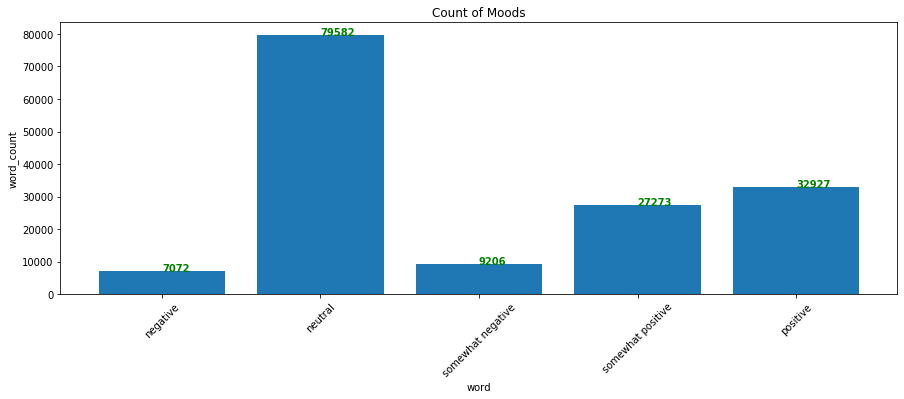

In [12]:

Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','neutral','somewhat negative','somewhat positive','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

In [16]:

def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [21]:
corpus= []
for i in range(0, 156060):
    corpus.append(review_to_words(train_data['Phrase'][i]))
corpus

['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander occasionally amuses none amount much story',
 'also good gander occasionally amuses none amount much story',
 'also',
 'also',
 'good gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander',
 'gander',
 'gander',
 '',
 'occasionally amuses none amount much story',
 '',
 '',
 '',
 '',
 'occasionally amuses none amount much story',
 'occasionally',
 '

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samsung\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True